In [1]:
#file = open("./file.txt", "r")
#FileContent = file.read().strip()

In [29]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic
import emoji
import regex as re

In [30]:
df = pd.read_csv("text-query-tweets.csv")
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii')) # Get rid of emojis
df.columns = df.columns.str.lower() # Lower columns
df["tweet"] = df["tweet"].str.replace("&amp;", "and")
df['tweet'][48]

'The deliberations by the world leaders will shape the future of our struggle against climate change. What we face today is the challenge of the century. We have a duty to leave a clean and green environment to our coming generations. At #COP27, we should vow to succeed at all costs'

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer() # BERTopic works better without words lemmatization 
nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x) # Tokenisation is very important for BERTopic
  #x = lemmatizer.lemmatize(x) # For BerTOPIC we dont lemmatise words!
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['clean_text'] = df.tweet.apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /Users/lst/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/lst/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,user,date created,number of likes,retweets,source of tweet,tweet,clean_text
0,DiEM_25,2022-11-07,55460,17928,Twitter Web App,The world's elite have arrived at #COP27 on hu...,world 's elite arrived hundreds private jets l...
1,RishiSunak,2022-11-07,38526,2389,Twitter Web App,Friends Partners Allies Great to meet with to...,friends partners allies great meet today
2,_david_ho_,2022-11-07,22782,4326,Twitter for iPhone,"At this point, maybe we should ask women for h...",point maybe ask women help
3,JamesMelville,2022-11-06,21759,5467,Twitter for iPhone,Climate change will ravage our planet without ...,climate change ravage planet without urgent ac...
4,antonioguterres,2022-11-07,19139,7355,Twitter for iPhone,I have just warned global leaders at #COP27:We...,warned global leaders highway climate hell foo...


In [32]:
tweets = df.clean_text.to_list()
tweets

["world 's elite arrived hundreds private jets lecture climate change sponsored coca cola ",
 'friends partners allies great meet today ',
 'point maybe ask women help ',
 'climate change ravage planet without urgent action rishi sunak',
 'warned global leaders highway climate hell foot accelerator our planet fast approaching tipping points make climate chaos irreversible we need urgent ',
 'rich people flying private jets un talks sponsored coca cola give fossil fuel industry huge seat table criminalizing climate activists way stop irreversible catastrophic fossil fueled global heating ',
 'cop sponsored coca cola worlds top plastic polluter produce billion throwaway plastic bottles year ',
 ' private jets world leaders flying climate summit discuss reduce carbon emission',
 "brother last glass water prison please keep story alive 's saved this afternoon 'm flying sharm civil society pass egyptian regime claims civic space exists 'll testing ",
 'egypt attend',
 'incoming reports poli

In [33]:
topic_model = BERTopic(language="english", embedding_model="all-MiniLM-L6-v2")
topics, probs = topic_model.fit_transform(tweets)

In [34]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,107,-1_climate_world_president_minister
1,0,237,0_climate_must_change_sunak
2,1,47,1_egypt_climate_crisis_global
3,2,45,2_sheikh_sharm_el_summit
4,3,28,3_alaa_strike_prison_water
5,4,26,4_cop_today_friends_due
6,5,17,5_private_jets_coca_cola


In [35]:
topic_model.visualize_topics()

In [36]:
topic_model.visualize_barchart()

In [37]:
topic_model.visualize_heatmap()

In [38]:
topic_model.visualize_hierarchy()

In [39]:
representative_docs = topic_model.get_representative_docs(5)
representative_docs

[' private jets world leaders flying climate summit discuss reduce carbon emission',
 'told us wear masks socially distance yet held lavish parties they told us save planet yet travelled private jet motorcade told us play rules played set rules taking piss ',
 "world 's elite arrived hundreds private jets lecture climate change sponsored coca cola "]

In [40]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,107,-1_climate_world_president_minister
1,0,237,0_climate_must_change_sunak
2,1,47,1_egypt_climate_crisis_global
3,2,45,2_sheikh_sharm_el_summit
4,3,28,3_alaa_strike_prison_water
5,4,26,4_cop_today_friends_due
6,5,17,5_private_jets_coca_cola


In [41]:
df_topics = pd.DataFrame({"topic": topics, "document": tweets})
df_topics

,topic,document
0,5,world 's elite arrived hundreds private jets l...
1,4,friends partners allies great meet today
2,-1,point maybe ask women help
3,0,climate change ravage planet without urgent ac...
4,0,warned global leaders highway climate hell foo...
...,...,...
502,0,'ve started work sharm el sheikh 'll spend nov...
503,0,face many challenges climate change biggest th...
504,5,jolly boys outing world leaders pretend climat...
505,4,heading along half plane ive since cop missed ...


In [42]:
df_topics = pd.DataFrame({"topic": topics, "document": tweets})
df_topics["topic"] = df_topics["topic"].replace(5, "5_private_jets_cola_coca")
df_topics["topic"] = df_topics["topic"].replace(4, "4_cop_today_due_work")
df_topics["topic"] = df_topics["topic"].replace(3, "3_alaa_strike_prison_water")
df_topics["topic"] = df_topics["topic"].replace(2, "2_sheikh_sharm_el_summit")
df_topics["topic"] = df_topics["topic"].replace(1, "1_egypt_climate_crisis_russia")
df_topics["topic"] = df_topics["topic"].replace(0, "0_climate_must_change_world")
df_topics["topic"] = df_topics["topic"].replace(-1, "-1_climate_minister_world_president")
df_topics

,topic,document
0,5_private_jets_cola_coca,world 's elite arrived hundreds private jets l...
1,4_cop_today_due_work,friends partners allies great meet today
2,-1_climate_minister_world_president,point maybe ask women help
3,0_climate_must_change_world,climate change ravage planet without urgent ac...
4,0_climate_must_change_world,warned global leaders highway climate hell foo...
...,...,...
502,0_climate_must_change_world,'ve started work sharm el sheikh 'll spend nov...
503,0_climate_must_change_world,face many challenges climate change biggest th...
504,5_private_jets_cola_coca,jolly boys outing world leaders pretend climat...
505,4_cop_today_due_work,heading along half plane ive since cop missed ...


In [48]:
df['topics'] = df_topics["topic"]
df['number of likes'] = df['number of likes'].astype(str).astype(int)
df['number of likes'].info

<bound method Series.info of 0      55460
1      38526
2      22782
3      21759
4      19139
       ...  
502      265
503      262
504      261
505      260
506      258
Name: number of likes, Length: 507, dtype: int64>

In [65]:
df.to_csv('tweets_with_topics.csv')
df.to_excel('tweets_with_topics.xlsx')

In [62]:
df_topics_summed = df.groupby('topics')['number of likes'].sum()
df_topics_summed = df_topics_summed.reset_index()
df_topics_summed = df_topics_summed.sort_values(by=['number of likes'], ascending=False)

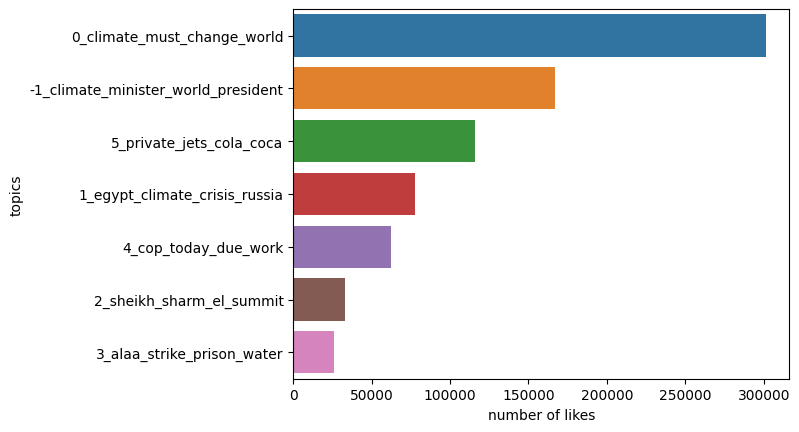

In [63]:
import seaborn as sns


order = df.groupby('topics')['number of likes'].sum().sort_values(ascending=False).index
#sns.barplot(data=df_emojis_topics, x="topics", y="Number of Likes", order=order)
p = sns.barplot(x='number of likes',
            y="topics", 
            data=df_topics_summed)

<BarContainer object of 7 artists>

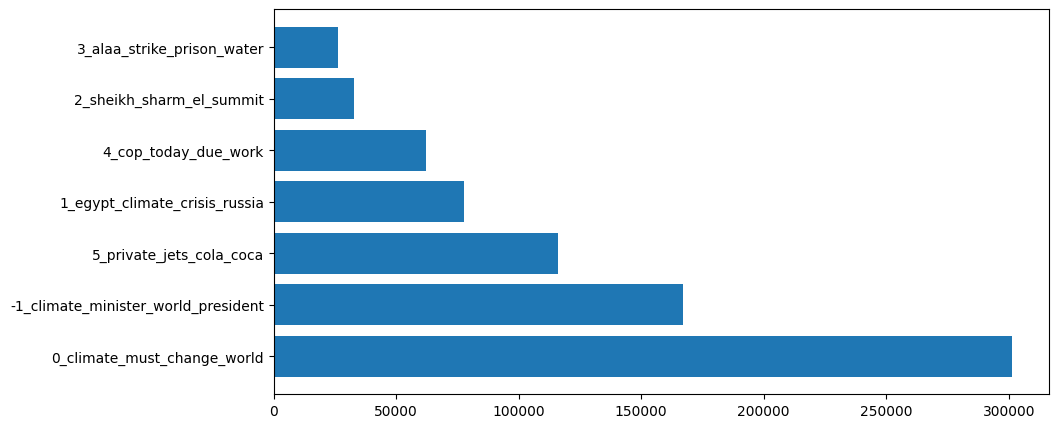

In [64]:
import numpy as np
import matplotlib.pyplot as plt

topics = df_topics_summed['topics']
likes = df_topics_summed['number of likes']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(topics, likes)

In [45]:
df_topics.to_csv('df_preprocessed_topics.csv')
df_topics.to_excel('df_preprocessed_topics.xlsx')